In [93]:
import pandas as pd
import numpy as np
from numpy import count_nonzero
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy import sparse



In [95]:
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
df = pd.read_csv("aps_failure_set.csv",               
na_values = missing_value_formats)

In [96]:
df.shape

(60000, 171)

In [97]:
print("Number of rows: ", len(df))
print("Number of columns: ", len(list(df.columns)))

Number of rows:  60000
Number of columns:  171


In [98]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   60000 non-null  object 
 1    aa_000  60000 non-null  int64  
 2    ab_000  13671 non-null  float64
 3    ac_000  56665 non-null  float64
 4    ad_000  45139 non-null  float64
 5    ae_000  57500 non-null  float64
 6    af_000  57500 non-null  float64
 7    ag_000  59329 non-null  float64
 8    ag_001  59329 non-null  float64
 9    ag_002  59329 non-null  float64
 10   ag_003  59329 non-null  float64
 11   ag_004  59329 non-null  float64
 12   ag_005  59329 non-null  float64
 13   ag_006  59329 non-null  float64
 14   ag_007  59329 non-null  float64
 15   ag_008  59329 non-null  float64
 16   ag_009  59329 non-null  float64
 17   ah_000  59355 non-null  float64
 18   ai_000  59371 non-null  float64
 19   aj_000  59371 non-null  float64
 20   ak_000  55600 non-null  float64
 21   al_000  59

In [99]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   60000 non-null  object 
 1    aa_000  60000 non-null  int64  
 2    ab_000  13671 non-null  float64
 3    ac_000  56665 non-null  float64
 4    ad_000  45139 non-null  float64
 5    ae_000  57500 non-null  float64
 6    af_000  57500 non-null  float64
 7    ag_000  59329 non-null  float64
 8    ag_001  59329 non-null  float64
 9    ag_002  59329 non-null  float64
 10   ag_003  59329 non-null  float64
 11   ag_004  59329 non-null  float64
 12   ag_005  59329 non-null  float64
 13   ag_006  59329 non-null  float64
 14   ag_007  59329 non-null  float64
 15   ag_008  59329 non-null  float64
 16   ag_009  59329 non-null  float64
 17   ah_000  59355 non-null  float64
 18   ai_000  59371 non-null  float64
 19   aj_000  59371 non-null  float64
 20   ak_000  55600 non-null  float64
 21   al_000  59

In [100]:
pd.options.display.max_info_columns = 171
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   60000 non-null  object 
 1    aa_000  60000 non-null  int64  
 2    ab_000  13671 non-null  float64
 3    ac_000  56665 non-null  float64
 4    ad_000  45139 non-null  float64
 5    ae_000  57500 non-null  float64
 6    af_000  57500 non-null  float64
 7    ag_000  59329 non-null  float64
 8    ag_001  59329 non-null  float64
 9    ag_002  59329 non-null  float64
 10   ag_003  59329 non-null  float64
 11   ag_004  59329 non-null  float64
 12   ag_005  59329 non-null  float64
 13   ag_006  59329 non-null  float64
 14   ag_007  59329 non-null  float64
 15   ag_008  59329 non-null  float64
 16   ag_009  59329 non-null  float64
 17   ah_000  59355 non-null  float64
 18   ai_000  59371 non-null  float64
 19   aj_000  59371 non-null  float64
 20   ak_000  55600 non-null  float64
 21   al_000  59

In [101]:
df.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [102]:
df.describe()


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [103]:
df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

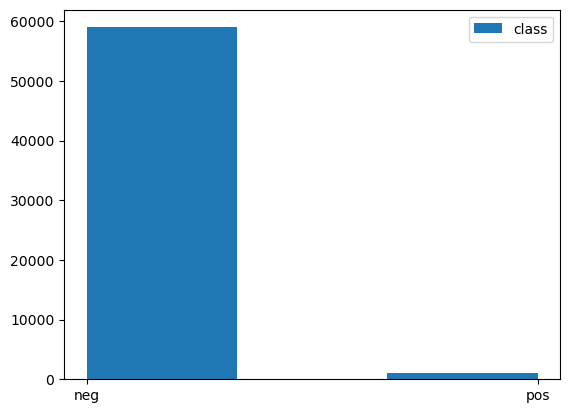

In [104]:
df["class"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "class", bins = 3);


In [105]:
print("There are a total of " + (str(df.duplicated().sum()) + " duplicates in the dataset."))

There are a total of 0 duplicates in the dataset.


In [106]:
df.isna().values.any()


True

In [107]:
# Checking the total of missing values

df.isna().sum().sum()

850015

In [108]:

df["class"].isna().sum().sum()

0

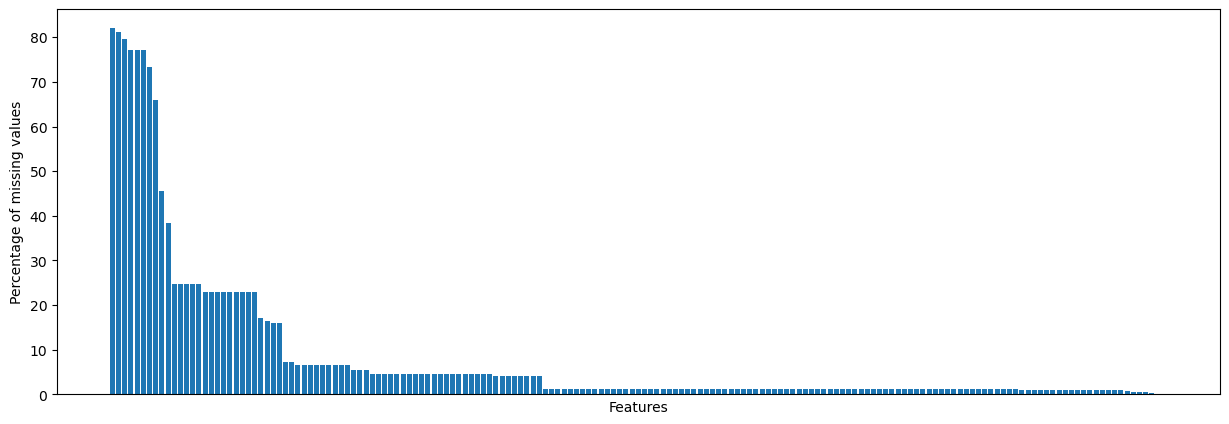

In [109]:
# calculating the percentage of missing values for each feature

df_na = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)

fig, ax = plt.subplots(figsize = (15, 5))
ax.bar(df_na.index, df_na.values.T[0])
plt.xticks([])
plt.xlabel("Features")
plt.ylabel("Percentage of missing values");

In [110]:
cols_na = df_na[df_na[0] > 60]
print("There are " + str(len(cols_na)) + " columns with NaNs above 60%.")

There are 8 columns with NaNs above 60%.


In [111]:
# Obtaining a list of the columns with more than 60% missing values

cols_to_drop = list(cols_na.index)
cols_to_drop

['br_000',
 'bq_000',
 'bp_000',
 'bo_000',
 'ab_000',
 'cr_000',
 'bn_000',
 'bm_000']

In [112]:
df = df.drop(columns = ["br_000", "bq_000", "bp_000", "bo_000", "ab_000", "cr_000", "bn_000", "bm_000"])
df

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [113]:
df.isna().values.any()

True

In [114]:
# Checking the total of missing values in the dataset after dropping the columns with more than 60% missing values

df.isna().sum().sum()

481740

In [115]:
# Calculating the sparsity of the data

sparsity = 1 - count_nonzero(df) / df.size
print("Sparsity of the dataframe is: " + str(round(sparsity, 2)) + ".")

Sparsity of the dataframe is: 0.33.


In [116]:
sparse.issparse(df)

False

In [117]:
# Assigning the independet variables to a new variable X

X = df.drop("class", axis = 1)

# Assigning the dependent variable to a new variable y

y = df["class"]

In [118]:
# Scaling the independent variables

scaler = preproc.MinMaxScaler()
X = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X)
df_scaled.values


array([[2.79250729e-02, 9.99999832e-01, 3.26176944e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00,            nan, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 1.07006746e-07, 1.16491766e-08, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 9.99999829e-01, 2.09685178e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 5.75469322e-08, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 3.27590826e-07, 7.31568288e-08, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

In [119]:
# Calculating the lower limit

lower_limit = df_scaled.mean() - 1.5 * df_scaled.std()
lower_limit


0     -0.057821
1     -0.392498
2     -0.007038
3     -0.011187
4     -0.015131
         ...   
157   -0.018781
158   -0.027795
159   -0.016487
160   -0.013408
161   -0.011373
Length: 162, dtype: float64

In [120]:
upper_limit = df_scaled.mean() + 1.5 * df_scaled.std()
upper_limit


0      0.101029
1      0.726673
2      0.007082
3      0.011835
4      0.016228
         ...   
157    0.024572
158    0.042195
159    0.020891
160    0.013784
161    0.011744
Length: 162, dtype: float64

In [121]:
display(df_scaled[~((df_scaled < upper_limit) & (df_scaled > lower_limit))])

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027923
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046641,NaN,NaN,NaN
59996,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101946,NaN,NaN


In [122]:
df_scaled[df_scaled < lower_limit] = np.nan
df_scaled[df_scaled > upper_limit] = np.nan

In [123]:
# Checking the amount of null values in the dataset after removing outliers and leaving the observations null

df_scaled.isna().sum().sum()

692782

In [124]:
# Replacing the NaNs with median values

column_medians = df_scaled.median()
df_scaled = df_scaled.fillna(column_medians)
display(df_scaled)

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.027925,3.473026e-08,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.627842e-04,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.0
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.977081e-05,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.0
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.201835e-06,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.0
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,9.666541e-06,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.0
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.911982e-04,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.055707,3.116337e-07,2.166747e-08,0.0,0.000000,0.0,0.0,0.0,0.000040,2.582697e-04,...,0.012812,0.015013,1.328221e-02,2.121074e-02,3.226316e-02,0.006002,0.000137,0.007503,0.000000,0.0
59996,0.000832,3.473026e-08,2.609416e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,4.544847e-07,...,0.000136,0.000179,2.174522e-04,1.191324e-03,4.302733e-06,0.000000,0.000000,0.000000,0.000000,0.0
59997,0.000041,3.473026e-08,2.096852e-09,0.0,0.000000,0.0,0.0,0.0,0.000000,1.223613e-07,...,0.000010,0.000010,4.652485e-06,2.507172e-06,4.619111e-06,0.000022,0.000000,0.000000,0.000000,0.0
59998,0.029234,3.473026e-08,5.754693e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.442115e-06,...,0.008974,0.005897,3.575600e-03,3.930061e-03,6.151643e-03,0.001380,0.041639,0.000000,0.000000,0.0


In [125]:
# Confirming that there is no null values in the dataset after replacing them with medians

df_scaled.isna().sum().sum()


0

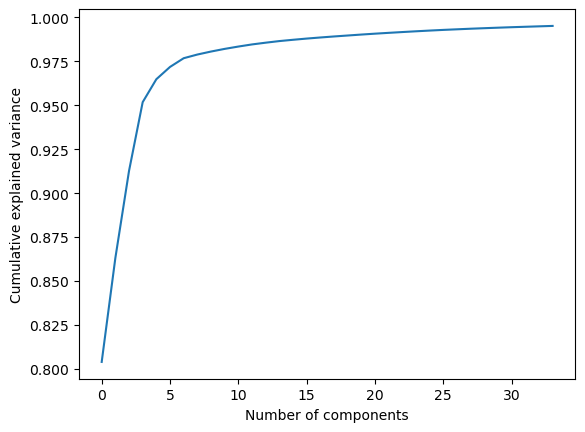

In [126]:
# Applying PCA to choose the minimum number of principal components such that 99,5% of the variance is retained

pca = PCA(0.995)
pca.fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("Number of components") 
plt.ylabel("Cumulative explained variance"); 

In [129]:
projected = pca.fit_transform(df_scaled)
projected.shape

(60000, 34)

In [130]:
df_pca = pd.DataFrame(projected, columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", 
                                            "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", 
                                            "C26", "C27", "C28", "C29", "C30", "C31", "C32", "C33", "C34"])

In [131]:
display(df_pca)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34
0,0.381978,-0.089073,0.137210,0.010637,0.057561,-0.017508,-0.038228,0.010331,-0.016735,-0.001598,...,0.013458,-0.020029,0.019136,0.005336,0.003806,0.014557,-0.005117,-0.002509,-0.005638,0.009714
1,-0.224381,0.050526,0.180623,-0.032381,-0.033070,0.001566,-0.012479,-0.009840,-0.004815,-0.014345,...,0.002856,0.003680,-0.004772,0.004172,0.003944,0.001123,-0.001825,-0.001363,-0.000946,0.001098
2,-0.061179,0.022151,-0.065697,0.061365,-0.020714,0.005997,-0.014418,-0.000585,0.002970,0.007216,...,0.004015,0.003217,-0.000640,-0.003002,-0.002234,-0.000681,-0.000291,-0.000165,0.000770,-0.002271
3,-0.320269,0.012590,-0.019173,-0.030474,-0.010025,0.000947,0.006226,-0.001724,0.000688,-0.001802,...,0.000347,-0.000538,0.000002,-0.000412,0.000082,0.000081,0.000107,0.000046,-0.000007,-0.000031
4,0.427941,-0.024413,0.075702,-0.017921,0.075502,0.007733,-0.031699,0.003838,0.018591,-0.004057,...,-0.008434,0.001581,-0.001388,-0.005688,-0.004536,-0.010497,-0.001274,0.001446,-0.000872,-0.005960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.083309,-0.062689,0.131940,0.183863,-0.027617,0.023544,-0.017740,-0.004836,0.009590,-0.039670,...,-0.026914,-0.003737,0.002712,-0.021780,-0.003527,-0.000076,-0.012038,-0.001858,-0.005858,0.005951
59996,-0.173308,0.021086,-0.025893,-0.039264,-0.011897,0.001522,0.007670,-0.001328,0.001562,-0.001580,...,-0.000476,-0.000872,0.000088,-0.000743,-0.000486,0.000074,0.000028,0.000617,-0.000664,-0.000086
59997,-0.295142,0.014010,-0.020321,-0.032066,-0.009751,0.001021,0.006697,-0.001406,0.000369,-0.001908,...,0.000272,-0.000506,-0.000042,-0.000392,0.000164,0.000172,0.000169,0.000033,-0.000046,-0.000083
59998,-0.240077,-0.097206,0.146309,0.063673,-0.032610,-0.015502,-0.054719,-0.011614,-0.006552,-0.018736,...,-0.025253,-0.002975,0.000938,0.007222,0.001688,-0.009770,-0.001385,0.002635,-0.003572,0.014228


In [132]:
df_pca["class"] = df["class"]
df_pca


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C26,C27,C28,C29,C30,C31,C32,C33,C34,class
0,0.381978,-0.089073,0.137210,0.010637,0.057561,-0.017508,-0.038228,0.010331,-0.016735,-0.001598,...,-0.020029,0.019136,0.005336,0.003806,0.014557,-0.005117,-0.002509,-0.005638,0.009714,neg
1,-0.224381,0.050526,0.180623,-0.032381,-0.033070,0.001566,-0.012479,-0.009840,-0.004815,-0.014345,...,0.003680,-0.004772,0.004172,0.003944,0.001123,-0.001825,-0.001363,-0.000946,0.001098,neg
2,-0.061179,0.022151,-0.065697,0.061365,-0.020714,0.005997,-0.014418,-0.000585,0.002970,0.007216,...,0.003217,-0.000640,-0.003002,-0.002234,-0.000681,-0.000291,-0.000165,0.000770,-0.002271,neg
3,-0.320269,0.012590,-0.019173,-0.030474,-0.010025,0.000947,0.006226,-0.001724,0.000688,-0.001802,...,-0.000538,0.000002,-0.000412,0.000082,0.000081,0.000107,0.000046,-0.000007,-0.000031,neg
4,0.427941,-0.024413,0.075702,-0.017921,0.075502,0.007733,-0.031699,0.003838,0.018591,-0.004057,...,0.001581,-0.001388,-0.005688,-0.004536,-0.010497,-0.001274,0.001446,-0.000872,-0.005960,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.083309,-0.062689,0.131940,0.183863,-0.027617,0.023544,-0.017740,-0.004836,0.009590,-0.039670,...,-0.003737,0.002712,-0.021780,-0.003527,-0.000076,-0.012038,-0.001858,-0.005858,0.005951,neg
59996,-0.173308,0.021086,-0.025893,-0.039264,-0.011897,0.001522,0.007670,-0.001328,0.001562,-0.001580,...,-0.000872,0.000088,-0.000743,-0.000486,0.000074,0.000028,0.000617,-0.000664,-0.000086,neg
59997,-0.295142,0.014010,-0.020321,-0.032066,-0.009751,0.001021,0.006697,-0.001406,0.000369,-0.001908,...,-0.000506,-0.000042,-0.000392,0.000164,0.000172,0.000169,0.000033,-0.000046,-0.000083,neg
59998,-0.240077,-0.097206,0.146309,0.063673,-0.032610,-0.015502,-0.054719,-0.011614,-0.006552,-0.018736,...,-0.002975,0.000938,0.007222,0.001688,-0.009770,-0.001385,0.002635,-0.003572,0.014228,neg
